In [1]:
import pandas as pd

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

folder_path = '09November-analysed/'
file_pattern = 'ResultsGPT_*.xlsx'
data = pd.DataFrame()

# List and read all matching Excel files
for file in os.listdir(folder_path):
    if file.startswith('ResultsGPT_') and file.endswith('.xlsx'):
        file_path = os.path.join(folder_path, file)
        new_data = pd.read_excel(file_path)
        data = pd.concat([data, new_data], ignore_index=True)

# Now combined_data contains all the data from the Excel files

# Assuming the rest of the code remains the same for plotting
# ...


data = data.fillna(" ")


In [62]:
data.head()

,language,filename,dataset_name,model,prompt,Edge Cases Notes,Others,Degradation Rate,Improvement Rate,Hallucination Rate,...,article_id,File,Date,Type,NbAlignedChar,century,Quality Band,groundtruth.line,Degraded (y/n),Improved (y/n)
0,el,../../data/datasets/htr/original/htrec/data/or...,htrec,BLOOMZ-7.1B,prompt_complex_02,,,C3.5. Invention of a new text,,Context inconsistency (the content of the LLM ...,...,104 Bodleian-Library-MS-Barocci-31_00320_fol-1...,,,,,13.0,60-80%,,,
1,el,../../data/datasets/htr/original/htrec/data/or...,htrec,BLOOMZ-7.1B,prompt_complex_02,,,C3.5. Invention of a new text,,Context inconsistency (the content of the LLM ...,...,104 Bodleian-Library-MS-Barocci-31_00320_fol-1...,,,,,13.0,60-80%,,,
2,el,../../data/datasets/htr/original/htrec/data/or...,htrec,LLAMA-2-7B,prompt_complex_02,,,C3.1 Paraphrasing,,Instruction inconsistency (LLM does not do wha...,...,104 Bodleian-Library-MS-Barocci-31_00320_fol-1...,,,,,13.0,60-80%,,,
3,el,../../data/datasets/htr/original/htrec/data/or...,htrec,LLAMA-2-7B,prompt_complex_02,,,C3.1 Paraphrasing,,Instruction inconsistency (LLM does not do wha...,...,104 Bodleian-Library-MS-Barocci-31_00320_fol-1...,,,,,13.0,60-80%,,,
4,el,../../data/datasets/htr/original/htrec/data/or...,htrec,GPT-4,prompt_complex_02,,,C3.1 Paraphrasing,,Instruction inconsistency (LLM does not do wha...,...,104 Bodleian-Library-MS-Barocci-31_00320_fol-1...,,,,,13.0,60-80%,,,


In [58]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'language', 'filename', 'dataset_name',
       'model', 'prompt', 'Degraded (y/n)', 'Degradation Rate',
       'Improved (y/n)', 'Improvement Rate', 'Hallucination Rate',
       'Response Rate', 'groundtruth.line', 'ocr.line', 'prediction.line',
       'prediction.line.postprocessed', 'groundtruth.sentence', 'ocr.sentence',
       'prediction.sentence', 'prediction.sentence.postprocessed',
       'groundtruth.region', 'ocr.region', 'prediction.region', 'prompt_text',
       'prediction.region.postprocessed', 'type', 'file', 'name_of_file_idx',
       'post-processings', 'length_prediction_tokens', 'length_ocr_tokens',
       'length_groundtruth_tokens', 'length_groundtruth_chars',
       'length_prediction_chars', 'length_ocr_chars', 'sentence-lev-ocr',
       'sentence-lev-pred', 'sentence-lev-improvement',
       'quality-band-sentence-postprocessed',
       'sentence-lev-pred-postprocessed',
       'sentence-lev-improvement-postprocessed', 'regio

In [59]:
for data, dataset in zip(dataframes, datasets):

    # Analyzing the data per model and per prompt
    grouped_data = data.groupby(['model', 'prompt', 'dataset_name'])

    # Calculating metrics like Degradation Rate and Improvement Rate
    # Assuming 'Degradation Rate' and 'Improvement Rate' are columns in your dataset
    # Here we calculate the mean, but you can calculate other statistics as needed
    degradation_rate_mean = grouped_data['Degraded (y/n)'].mean()
    improvement_rate_mean = grouped_data['Improved (y/n)'].mean()

    # Display the results
    print("Degradation Rate per Model and Prompt:")
    print(degradation_rate_mean)
    print("\nImprovement Rate per Model and Prompt:")
    print(improvement_rate_mean)

    # Further statistical analysis can be done as needed


Degradation Rate per Model and Prompt:
model        prompt             dataset_name
BLOOMZ-7.1B  prompt_basic_02    overproof       0.867347
             prompt_complex_02  overproof       0.061224
GPT-4        prompt_basic_02    overproof       0.081633
             prompt_complex_02  overproof       0.010204
LLAMA-2-7B   prompt_basic_02    overproof       0.909091
             prompt_complex_02  overproof       0.142857
Name: Degraded (y/n), dtype: float64

Improvement Rate per Model and Prompt:
model        prompt             dataset_name
BLOOMZ-7.1B  prompt_basic_02    overproof       0.122449
             prompt_complex_02  overproof       0.928571
GPT-4        prompt_basic_02    overproof       0.918367
             prompt_complex_02  overproof       0.989796
LLAMA-2-7B   prompt_basic_02    overproof       0.080808
             prompt_complex_02  overproof       0.857143
Name: Improved (y/n), dtype: float64
Degradation Rate per Model and Prompt:
model        prompt             da

In [54]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# for data, dataset in zip(dataframes, datasets):
#     print('--'*30)
#     print(dataset)
#     print('--'*30)
#     # Convert 'Degraded (y/n)' and 'Improved (y/n)' to Boolean if they are not already
#     data['Degraded (y/n)'] = data['Degraded (y/n)'].astype(bool)
#     data['Improved (y/n)'] = data['Improved (y/n)'].astype(bool)

#     # Bar Plot: Count of Degraded and Improved per Model
#     plt.figure(figsize=(10, 6))
#     degraded_count = data.groupby('model')['Degraded (y/n)'].sum()
#     improved_count = data.groupby('model')['Improved (y/n)'].sum()
#     count_df = pd.DataFrame({'Degraded': degraded_count, 'Improved': improved_count})
#     count_df.plot(kind='bar', ax=plt.gca())
#     plt.title('Count of Degraded and Improved Instances per Model')
#     plt.ylabel('Count')
#     plt.xlabel('Model')
#     plt.xticks(rotation=45)
#     plt.tight_layout()

#     # Stacked Bar Plot: Proportion of Degraded vs Improved per Model
#     plt.figure(figsize=(10, 6))
#     prop_df = count_df.div(count_df.sum(axis=1), axis=0)
#     prop_df.plot(kind='bar', stacked=True, ax=plt.gca())
#     plt.title('Proportion of Degraded vs Improved Instances per Model')
#     plt.ylabel('Proportion')
#     plt.xlabel('Model')
#     plt.xticks(rotation=45)
#     plt.tight_layout()

#     # Heatmap: Degradation and Improvement Across Models and Prompts
#     plt.figure(figsize=(10, 8))
#     pivot_table = pd.pivot_table(data, values=['Degraded (y/n)', 'Improved (y/n)'], index='model', columns='prompt', aggfunc='mean')
#     sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
#     plt.title('Heatmap of Degradation and Improvement')
#     plt.ylabel('Model')
#     plt.xlabel('Prompt')
#     plt.xticks(rotation=45)
#     plt.tight_layout()

#     plt.show()


In [55]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns


# for data, dataset in zip(dataframes, datasets):
#     # Prepare the data: Calculate mean 'overall-levenshtein-improvement-postprocessed' for each combination
#     grouped_data = data.groupby(['prompt', 'model', 'Degraded (y/n)', 'Improved (y/n)'])['overall-levenshtein-improvement-postprocessed'].mean().reset_index()

#     # Create a bar plot for each prompt
#     prompts = data['prompt'].unique()
#     for prompt in prompts:
#         plt.figure(figsize=(12, 6))
#         prompt_data = grouped_data[grouped_data['prompt'] == prompt]

#         sns.barplot(x='model', y='overall-levenshtein-improvement-postprocessed', hue='Degraded (y/n)', data=prompt_data)

#         plt.title(f'Overall Levenshtein Improvement Postprocessed for {prompt}')
#         plt.xlabel('Model')
#         plt.ylabel('Overall Levenshtein Improvement Postprocessed')
#         plt.xticks(rotation=45)
#         plt.legend(title='Degraded', loc='upper right')
#         plt.tight_layout()
#         plt.show()



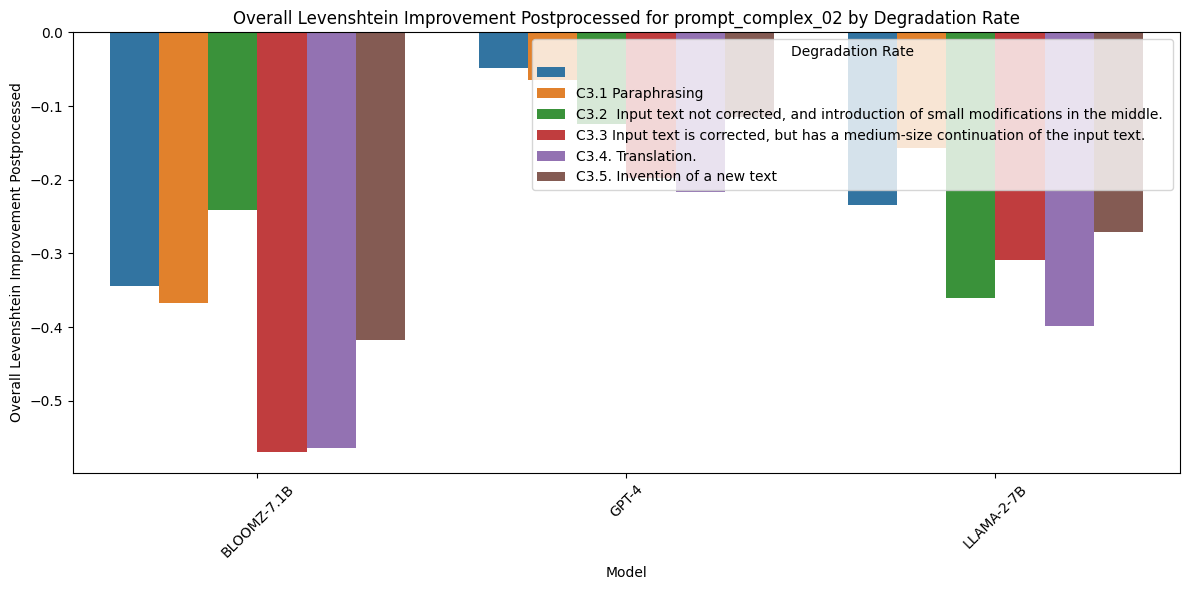

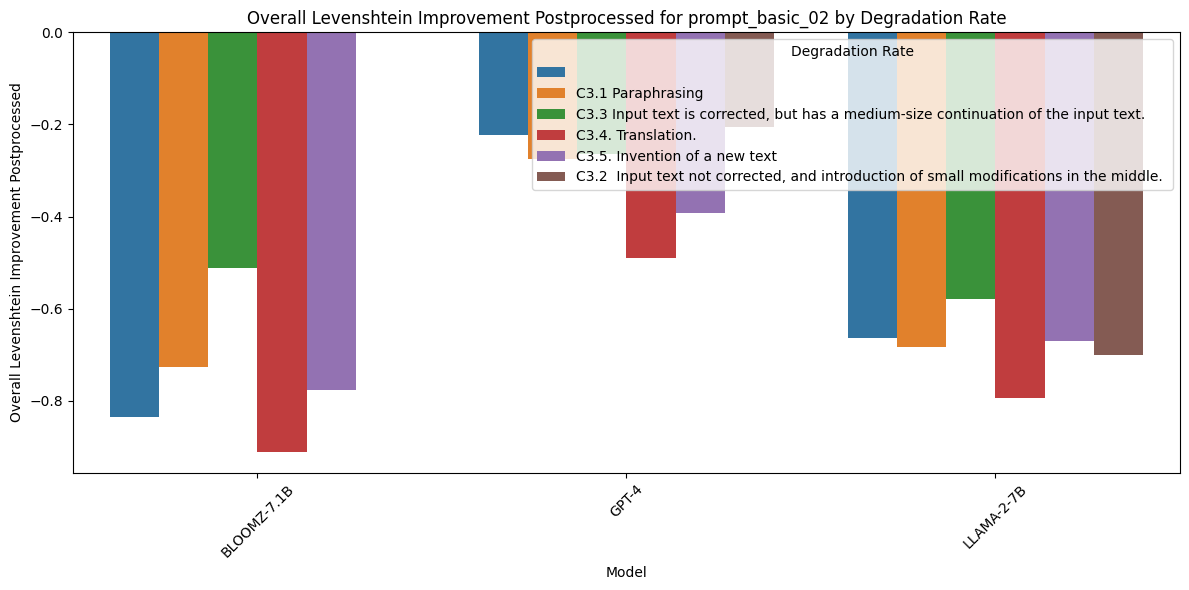

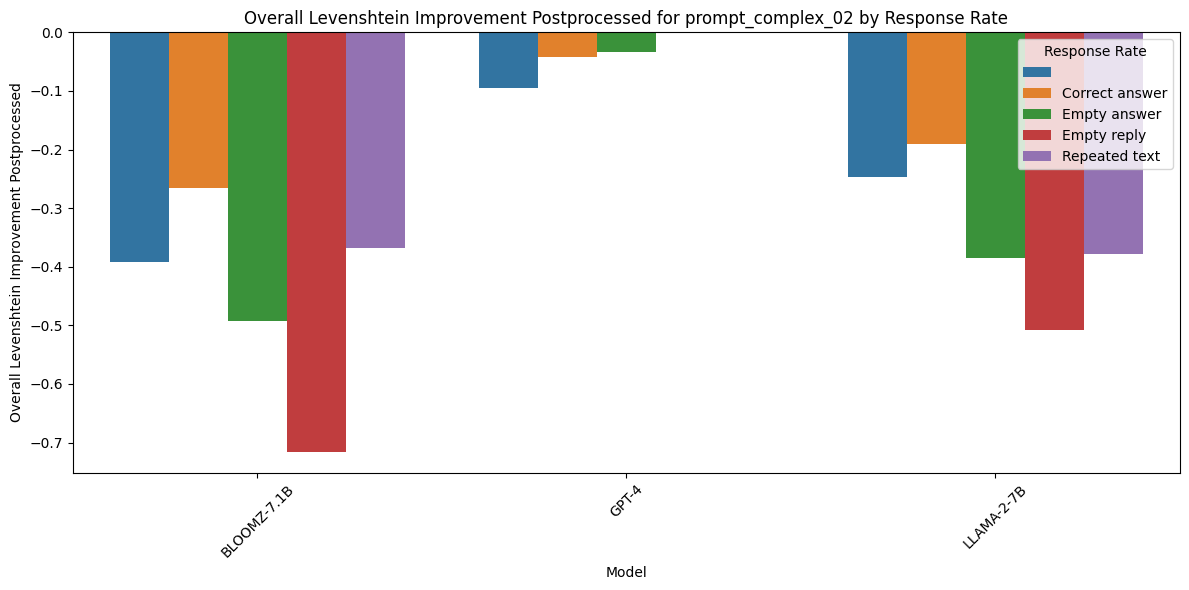

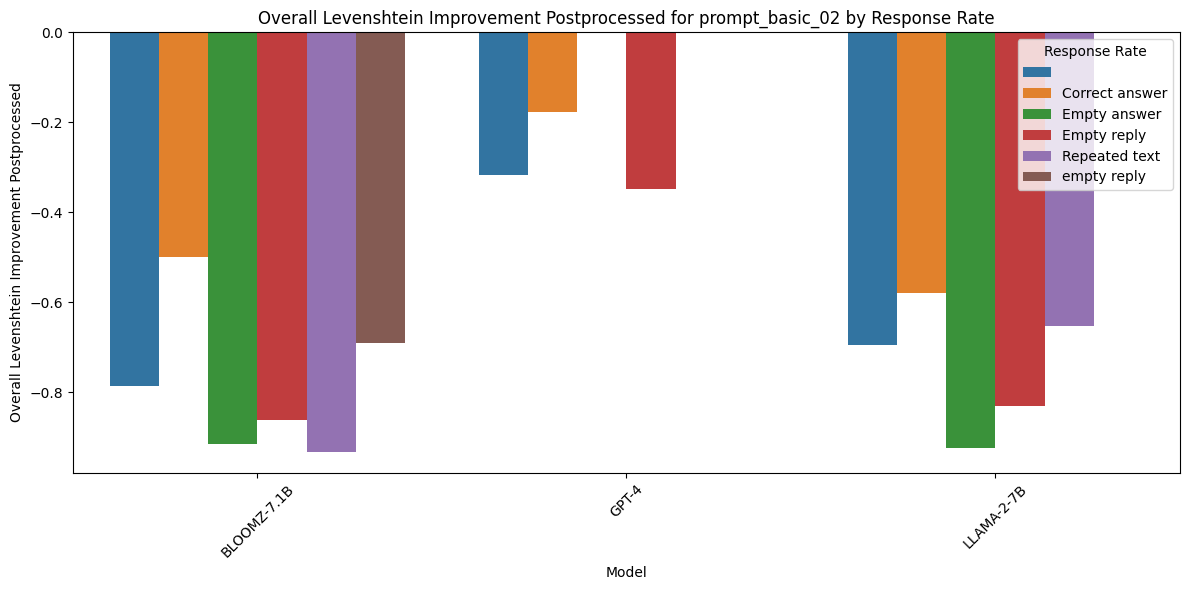

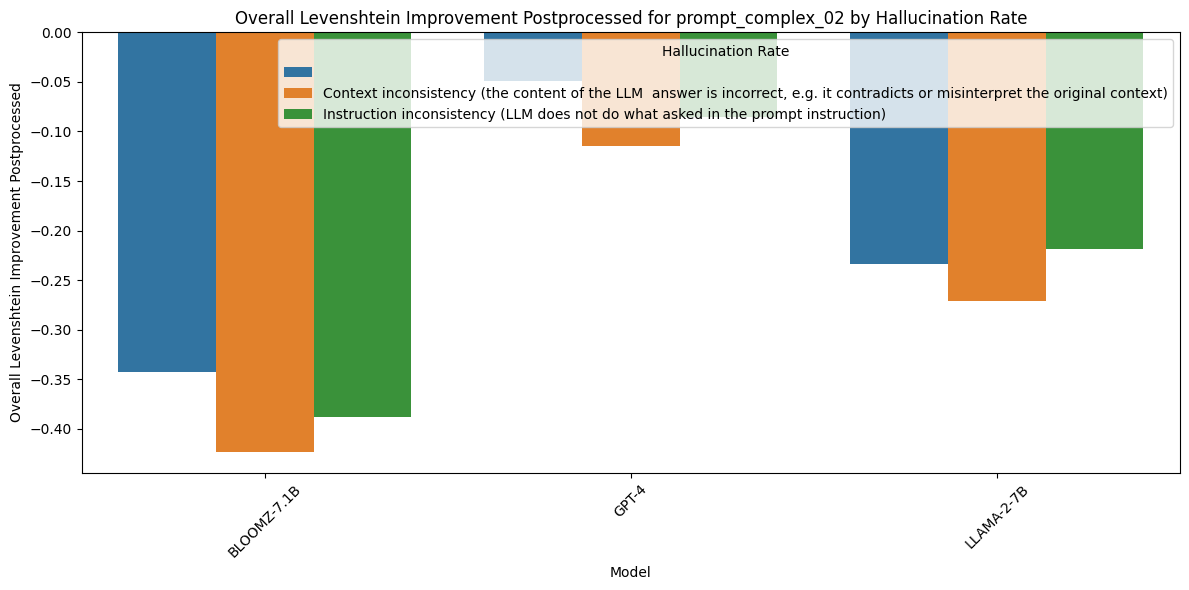

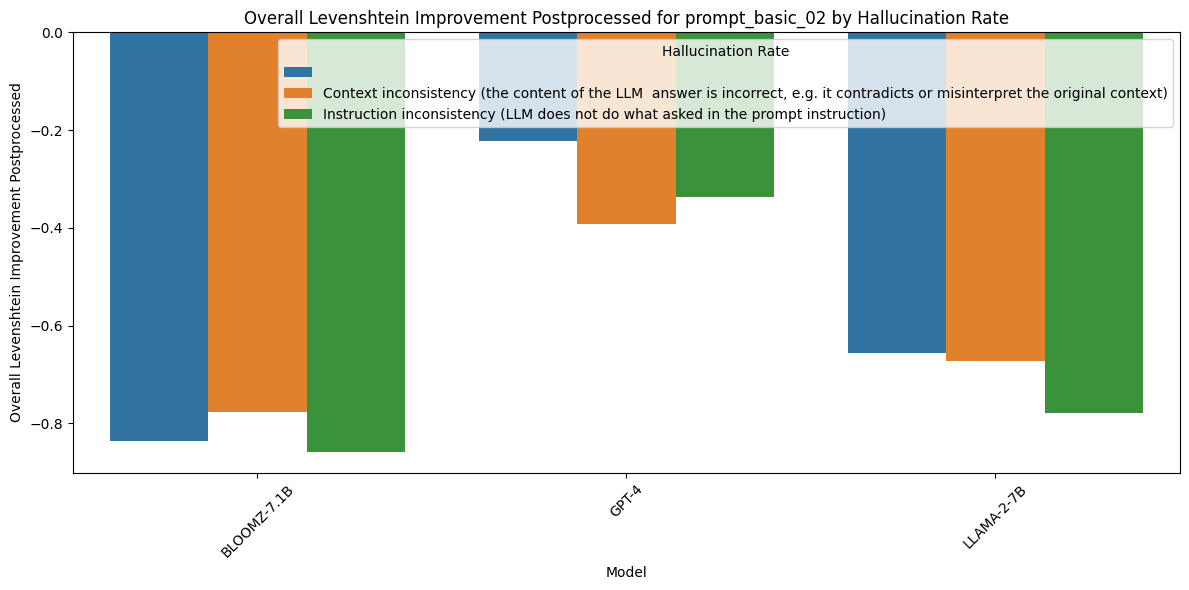

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame

# Prepare the data: Calculate mean 'overall-levenshtein-improvement-postprocessed' for each category in the rates
rate_columns = ['Degradation Rate', 'Response Rate', 'Hallucination Rate']
for rate_column in rate_columns:
    grouped_data = data.groupby(['prompt', 'model', rate_column])['overall-levenshtein-improvement-postprocessed'].mean().reset_index()

    # Create a bar plot for each prompt
    prompts = data['prompt'].unique()
    for prompt in prompts:
        plt.figure(figsize=(12, 6))
        prompt_data = grouped_data[grouped_data['prompt'] == prompt]

        sns.barplot(x='model', y='overall-levenshtein-improvement-postprocessed', hue=rate_column, data=prompt_data)

        plt.title(f'Overall Levenshtein Improvement Postprocessed for {prompt} by {rate_column}')
        plt.xlabel('Model')
        plt.ylabel('Overall Levenshtein Improvement Postprocessed')
        plt.xticks(rotation=45)
        plt.legend(title=rate_column, loc='upper right')
        plt.tight_layout()
        plt.show()


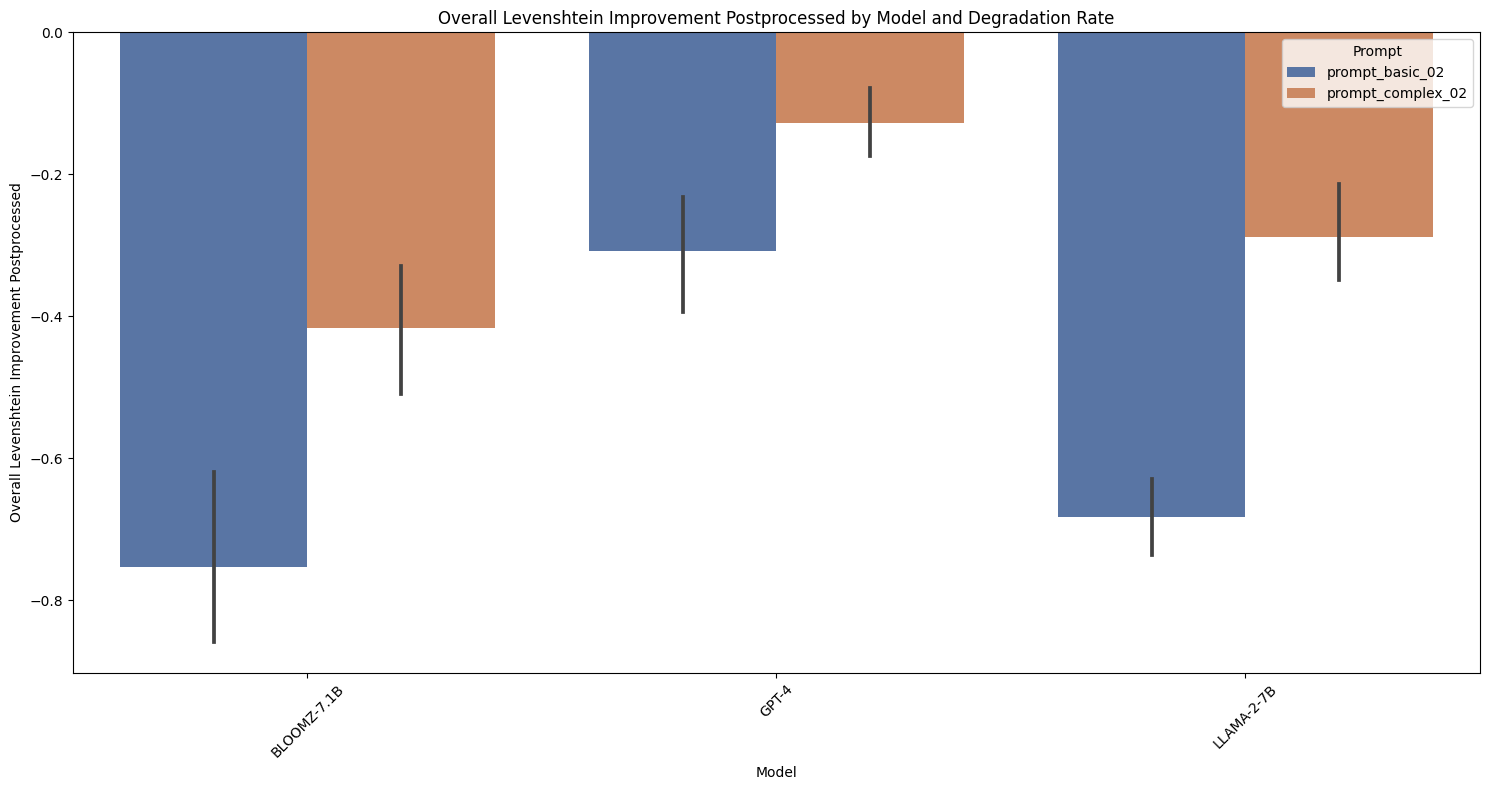

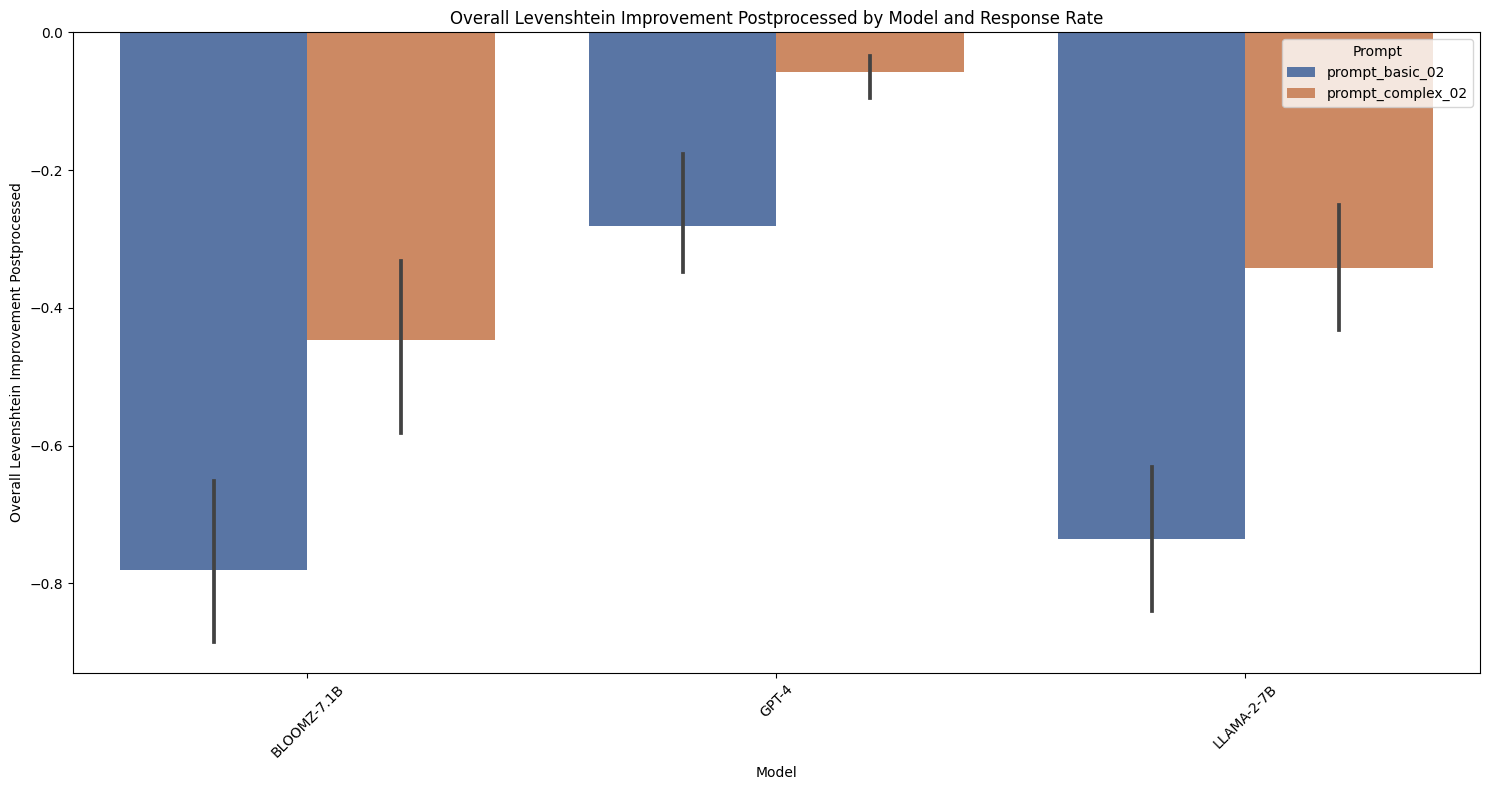

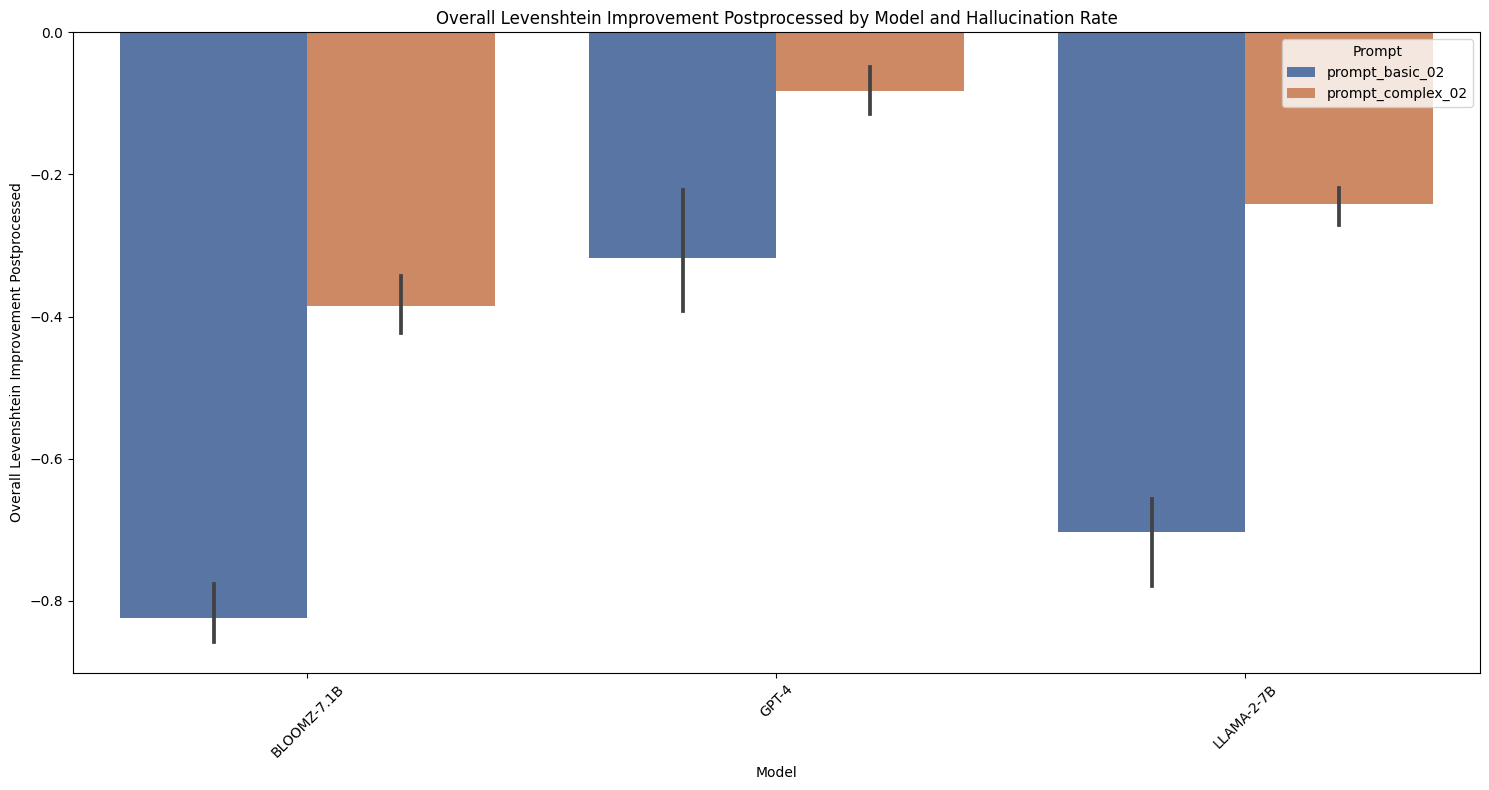

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame

# Rate columns to be visualized
rate_columns = ['Degradation Rate', 'Response Rate', 'Hallucination Rate']

# Creating a bar plot for each rate column, combining all prompts
for rate_column in rate_columns:
    plt.figure(figsize=(15, 8))

    # Grouping data by 'model', 'prompt', and the current rate column
    grouped_data = data.groupby(['model', 'prompt', rate_column])['overall-levenshtein-improvement-postprocessed'].mean().reset_index()

    # Creating a bar plot
    sns.barplot(x='model', y='overall-levenshtein-improvement-postprocessed', hue='prompt', data=grouped_data, palette="deep")

    plt.title(f'Overall Levenshtein Improvement Postprocessed by Model and {rate_column}')
    plt.xlabel('Model')
    plt.ylabel('Overall Levenshtein Improvement Postprocessed')
    plt.xticks(rotation=45)
    plt.legend(title='Prompt', loc='upper right')
    plt.tight_layout()
    plt.show()


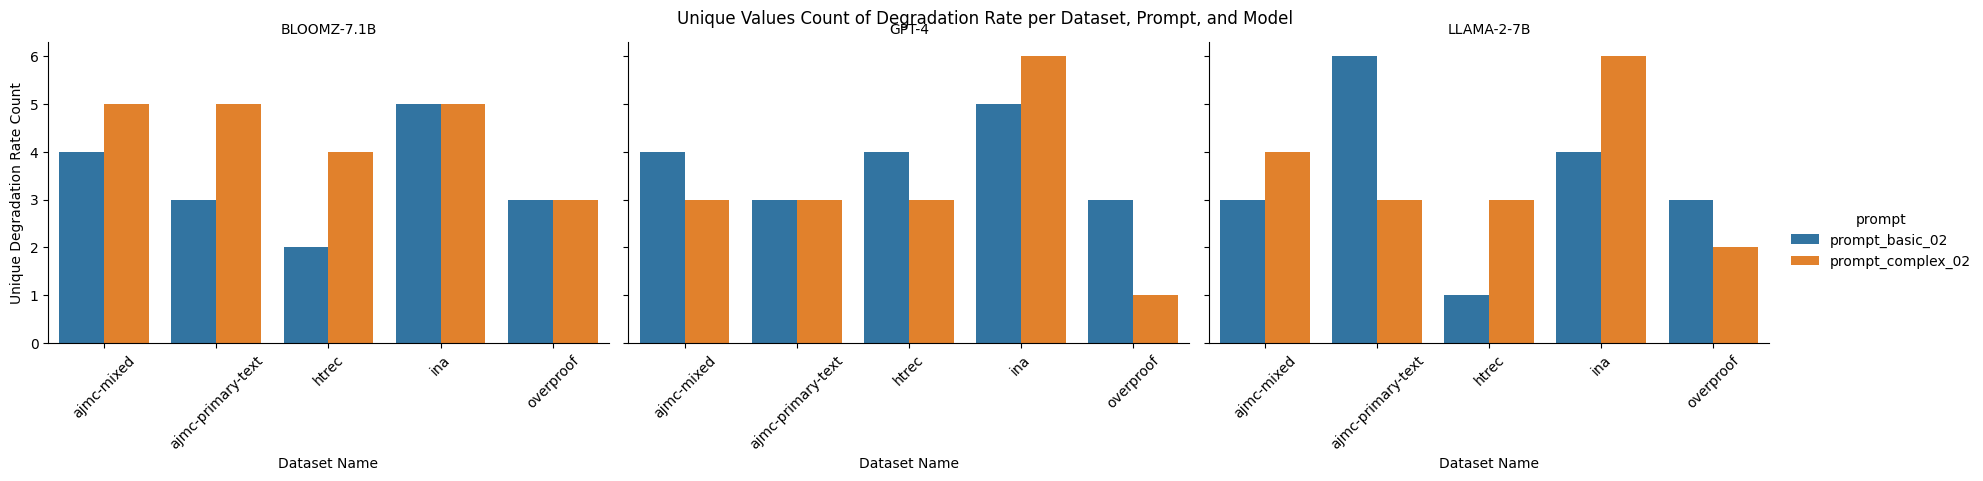

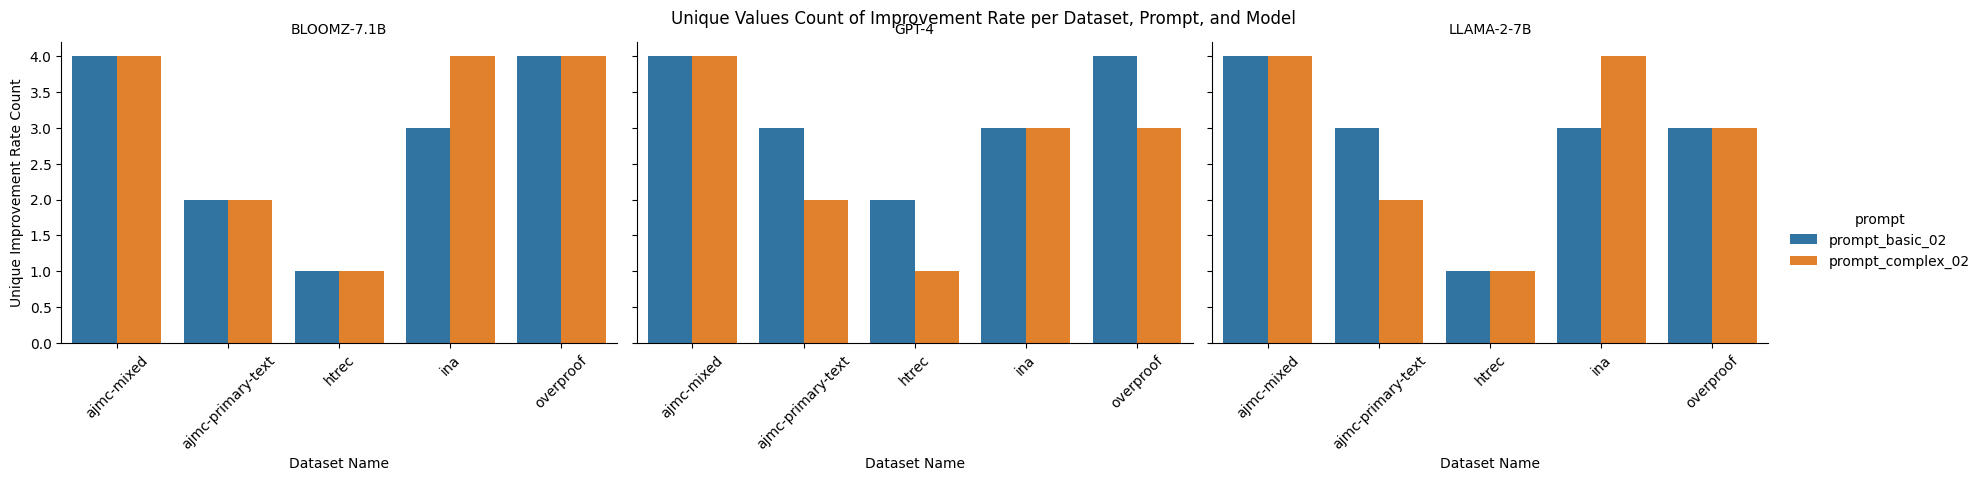

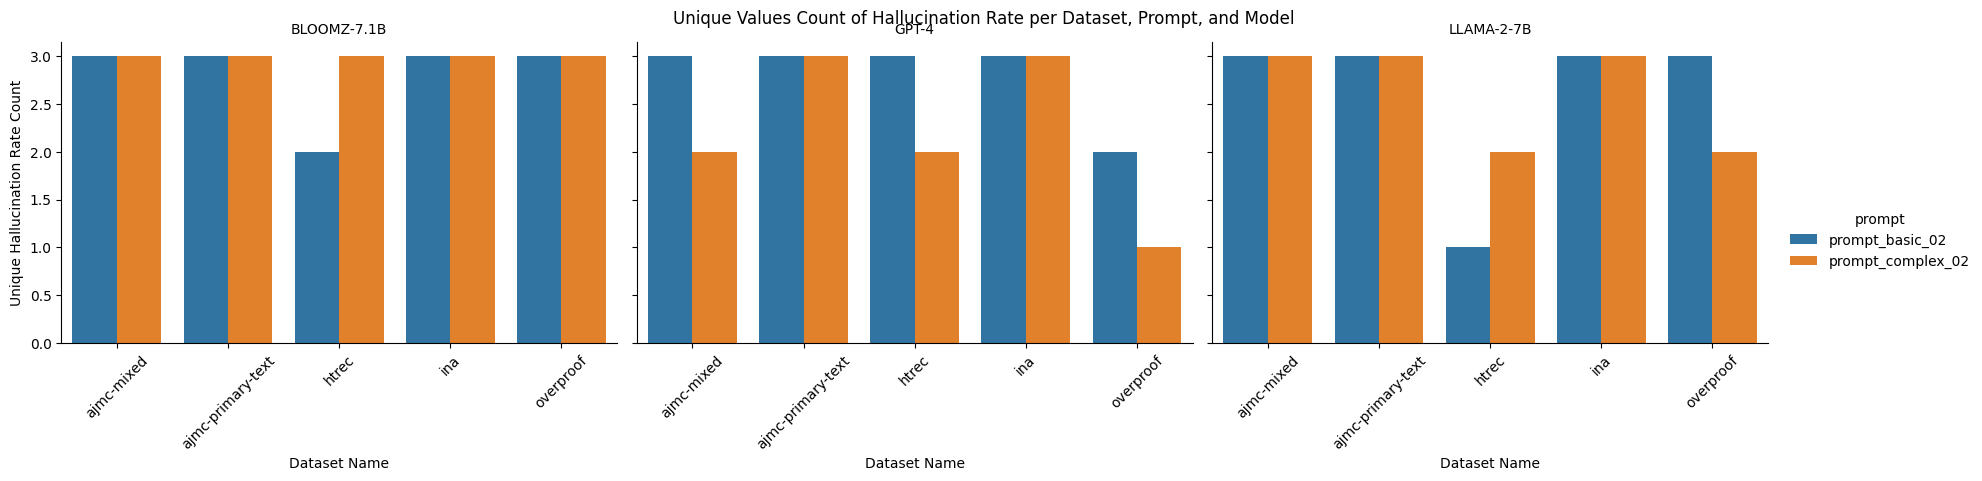

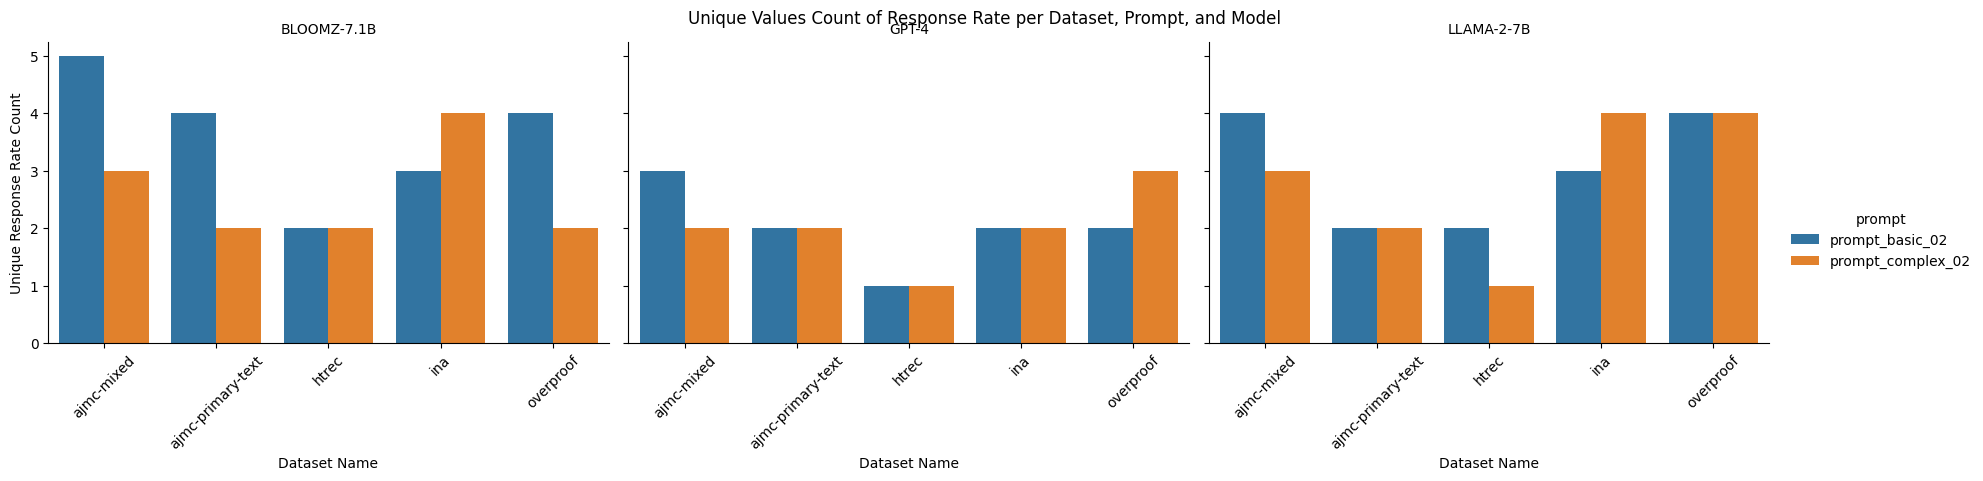

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


rate_columns = ['Degradation Rate', 'Improvement Rate', 'Hallucination Rate', 'Response Rate']

for rate_column in rate_columns:
    # Grouping by dataset, prompt, model, and the rate column, then counting unique values
    grouped_data = data.groupby(['dataset_name', 'prompt', 'model'])[rate_column].nunique().reset_index()

    # Plotting
    g = sns.catplot(x='dataset_name', y=rate_column, hue='prompt', col='model', 
                    data=grouped_data, kind='bar', height=4, aspect=1.5)

    # Adjusting plot parameters
    g.set_xticklabels(rotation=45)
    g.set_titles("{col_name}")
    g.set_axis_labels("Dataset Name", f"Unique {rate_column} Count")
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle(f'Unique Values Count of {rate_column} per Dataset, Prompt, and Model')

    plt.show()


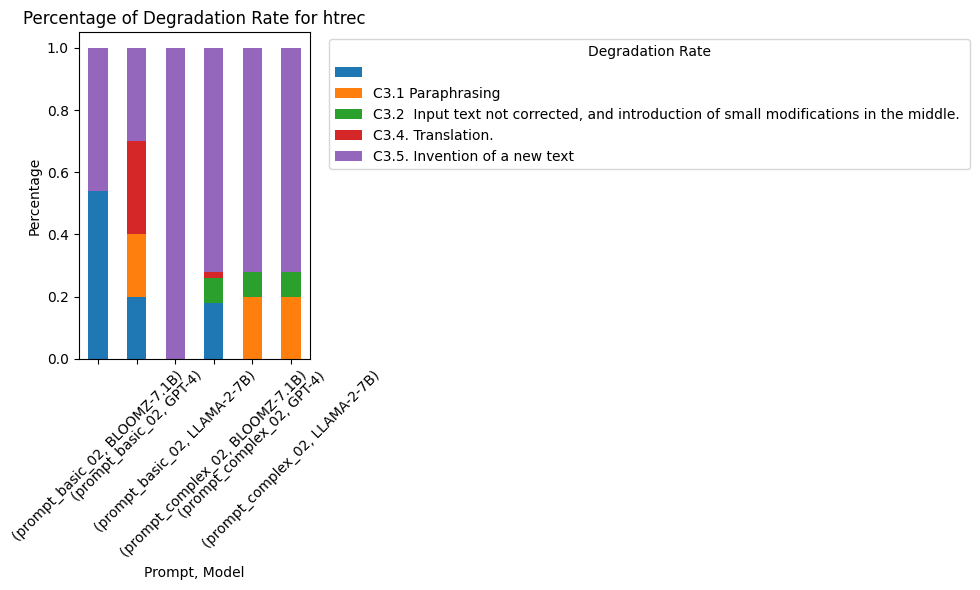

ValueError: could not convert string to float: ''

<Figure size 1200x800 with 0 Axes>

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

combined_data = data

# Assuming 'combined_data' is your DataFrame

def plot_stacked_bar(data, column, title, dataset_name):
    # Calculate the percentage for each category
    category_percentage = data.groupby(['prompt', 'model', column]).size() / data.groupby(['prompt', 'model']).size()
    category_percentage = category_percentage.reset_index(name='percentage').pivot_table(index=['prompt', 'model'], columns=column, values='percentage', fill_value=0)

    # Plot
    category_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'{title} for {dataset_name}')
    plt.ylabel('Percentage')
    plt.xlabel('Prompt, Model')
    plt.xticks(rotation=45)
    plt.legend(title=column, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

def plot_heatmap(data, column, title, dataset_name):
    # Create a pivot table
    pivot_table = data.pivot_table(index='prompt', columns='model', values=column, aggfunc=lambda x: x.value_counts().idxmax())

    # Plot
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
    plt.title(f'{title} for {dataset_name}')
    plt.ylabel('Prompt')
    plt.xlabel('Model')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

# Iterate over each dataset and plot
for dataset in combined_data['dataset_name'].unique():
    dataset_data = combined_data[combined_data['dataset_name'] == dataset]

    # Stacked Bar Plot for 'Degradation Rate'
    plot_stacked_bar(dataset_data, 'Degradation Rate', 'Percentage of Degradation Rate', dataset)

    # Heatmap for 'Improvement Rate'
    plot_heatmap(dataset_data, 'Improvement Rate', 'Most Common Improvement Rate', dataset)

    # Add similar calls for 'Hallucination Rate' and 'Response Rate' if needed
